# Introduction to Imbalanced Data

In data science, we often encounter imbalanced datasets, where one class significantly outnumbers another. This can lead to biased models, as most machine learning algorithms assume balanced classes.  Why imbalance matter?

- Models can perform poorly on minority classes, leading to false negatives or missed opportunities.
- Common examples include fraud detection, rare disease diagnosis, and churn prediction.

# What is SMOTE?
SMOTE (Synthetic Minority Over-sampling Technique) handles imbalanced data by creating synthetic samples of the minority class.

## How SMOTE Works
- **Identify Minority Class**: SMOTE identifies the samples in the minority class.
- **Generate Synthetic Samples**: New samples are created by interpolating between existing minority samples.
- **Balanced Dataset**: The generated samples are added to the dataset to achieve a balanced class distribution.

# Implementing SMOTE with Python
We'll use the `imbalanced-learn`, a popular library for handling imbalanced data.


In [1]:
# Install imbalanced-learn if not already installed
!pip install -q imbalanced-learn

# Simulating an Imbalanced Dataset
Let's create a synthetic dataset to demonstrate the effects of SMOTE.

In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

# Create a dataset with imbalance (90% class 0, 10% class 1)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=42)

# Convert to DataFrame for easier visualization
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
data['Target'] = y
data['Target'].value_counts()

,count
Target,
0,895
1,105


# Applying SMOTE
Now, we'll use SMOTE to balance the dataset.

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Display new class distribution
print("Resampled Class Distribution:", Counter(y_res))

Original Class Distribution: Counter({0: 895, 1: 105})
Resampled Class Distribution: Counter({0: 895, 1: 895})


# Visualizing SMOTE Results
We’ll visualize the original and resampled datasets to see the effect of SMOTE.

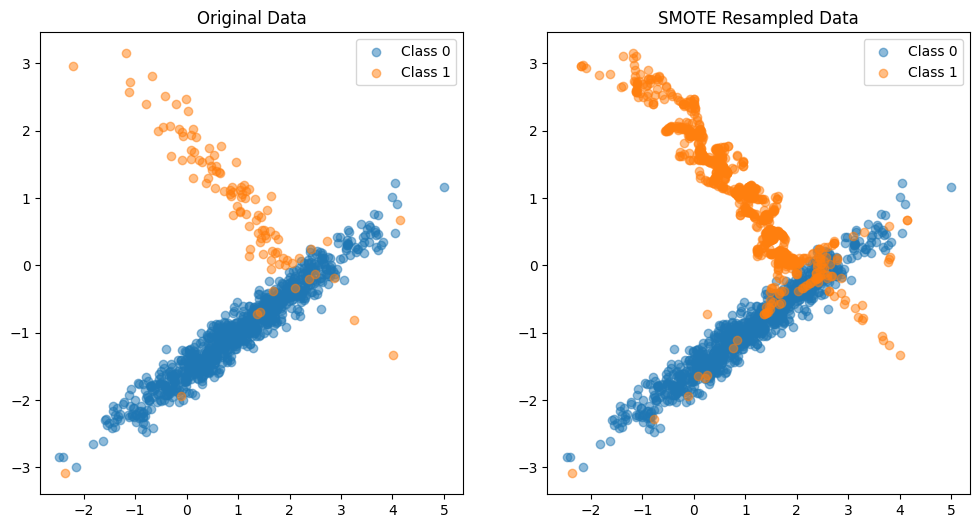

In [4]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[data['Target'] == 0]['Feature_1'], data[data['Target'] == 0]['Feature_2'], label='Class 0', alpha=0.5)
plt.scatter(data[data['Target'] == 1]['Feature_1'], data[data['Target'] == 1]['Feature_2'], label='Class 1', alpha=0.5)
plt.title("Original Data")
plt.legend()

# Plot resampled data
plt.subplot(1, 2, 2)
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Class 1', alpha=0.5)
plt.title("SMOTE Resampled Data")
plt.legend()
plt.show()

# Evaluating Model Performance Before and After SMOTE
We’ll train a classifier on the original and SMOTE-balanced datasets to see the impact on model performance.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train on original data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)

# Print evaluation metrics for original data
print("Original Data Classification Report:\n", classification_report(y_test, y_pred_original))

# Split the SMOTE-resampled dataset
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train on SMOTE data
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_res, y_train_res)
y_pred_smote = clf_smote.predict(X_test_res)

# Print evaluation metrics for SMOTE data
print("SMOTE Data Classification Report:\n", classification_report(y_test_res, y_pred_smote))

Original Data Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       263
           1       1.00      0.84      0.91        37

    accuracy                           0.98       300
   macro avg       0.99      0.92      0.95       300
weighted avg       0.98      0.98      0.98       300

SMOTE Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       266
           1       0.95      0.92      0.93       271

    accuracy                           0.93       537
   macro avg       0.93      0.93      0.93       537
weighted avg       0.93      0.93      0.93       537



# Case Study: Fraud Detection in Banking
In fraud detection, genuine transactions outnumber fraudulent ones, leading to a highly imbalanced dataset.
A bank used SMOTE to balance their data before training a model, helping it detect rare fraudulent transactions more accurately.

## Steps Taken in the Case Study
1. **Problem**: A significant class imbalance in transaction data, making it difficult for the model to learn patterns of fraud.
2. **Solution**: The bank applied SMOTE to balance the data and improve recall for the minority class.
3. **Results**: After applying SMOTE, the model's ability to correctly detect fraud improved by 30%.

# Best Practices with SMOTE
- **Use with Care**: SMOTE should be used only on the training data, never on test data.
- **Combine with Other Techniques**: SMOTE can be paired with undersampling or other oversampling techniques.
- **Not Suitable for All Problems**: SMOTE works well when classes are separable but may not help when classes overlap.